# Restaurant_food Project

In [1108]:
# Importing Required libraries

In [1109]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [1110]:
df_train=pd.read_csv('Restaurant_food1.csv','\t')
df_test=pd.read_csv('Restaurant_foodtest.csv','\t')

In [1111]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [1112]:
df_train.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [1113]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [1114]:
df_test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [1115]:
df_train.shape

(12690, 9)

In [1116]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [1117]:
df_train.count()

TITLE            12690
RESTAURANT_ID    12690
CUISINES         12690
TIME             12690
CITY             12578
LOCALITY         12592
RATING           12688
VOTES            11486
COST             12690
dtype: int64

In [1118]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [1119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [1120]:
df_train.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [1121]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [1122]:
df_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [1123]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [1124]:
df_train.drop(columns='TIME',inplace=True)

In [1125]:
cols_object_str=["CITY"]
for col in cols_object_str:
    df_train[col]=df_train[col].astype(str)
    
cols_object_str=["LOCALITY"]
for col in cols_object_str:
    df_train[col]=df_train[col].astype(str)    

In [1126]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [1127]:
df_train['CITY'].unique

<bound method Series.unique of 0              Thane
1            Chennai
2            Chennai
3             Mumbai
4             Mumbai
            ...     
12685      Hyderabad
12686         Mumbai
12687    Navi Mumbai
12688        Chennai
12689      Hyderabad
Name: CITY, Length: 12690, dtype: object>

In [1128]:
df_train['LOCALITY'].unique

<bound method Series.unique of 0              Dombivali East
1                   Ramapuram
2                  Saligramam
3                 Bandra West
4                 Lower Parel
                 ...         
12685              Gachibowli
12686    Bandra Kurla Complex
12687                   Vashi
12688             Maduravoyal
12689         Vanasthalipuram
Name: LOCALITY, Length: 12690, dtype: object>

In [1129]:
le=LabelEncoder()
df_train['TITLE']=le.fit_transform(df_train['TITLE'])
df_train['TITLE']

0        31
1        33
2        31
3        95
4        50
         ..
12685    95
12686    33
12687    71
12688    31
12689    31
Name: TITLE, Length: 12690, dtype: int32

In [1130]:
le=LabelEncoder()
df_train['CUISINES']=le.fit_transform(df_train['CUISINES'])
df_train['CUISINES']

0        2627
1         289
2        2976
3        4130
4        1766
         ... 
12685    2934
12686    2143
12687    2088
12688    3506
12689    2946
Name: CUISINES, Length: 12690, dtype: int32

In [1131]:
le=LabelEncoder()
df_train['CITY']=le.fit_transform(df_train['CITY'])
df_train['CITY']

0        320
1         67
2         67
3        222
4        222
        ... 
12685    131
12686    222
12687    239
12688     67
12689    131
Name: CITY, Length: 12690, dtype: int32

In [1132]:
le=LabelEncoder()
df_train['LOCALITY']=le.fit_transform(df_train['LOCALITY'])
df_train['LOCALITY']

0         285
1        1046
2        1101
3         136
4         620
         ... 
12685     342
12686     133
12687    1342
12688     631
12689    1333
Name: LOCALITY, Length: 12690, dtype: int32

In [1133]:
df_train = df_train.join(df_train['VOTES'].str.split(expand=True).add_prefix('VOTES'))

In [1134]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,VOTES0,VOTES1
0,31,9438,2627,320,285,3.6,49 votes,1200,49,votes
1,33,13198,289,67,1046,4.2,30 votes,1500,30,votes
2,31,10915,2976,67,1101,3.8,221 votes,800,221,votes
3,95,6346,4130,222,136,4.1,24 votes,800,24,votes
4,50,15387,1766,222,620,3.8,165 votes,300,165,votes
...,...,...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,546 votes,500,546,votes
12686,33,9686,2143,222,133,4.3,1214 votes,1800,1214,votes
12687,71,11133,2088,239,1342,4.0,608 votes,1300,608,votes
12688,31,6134,3506,67,631,3.5,32 votes,400,32,votes


In [1136]:
df_train.drop(df_train.columns[[6,9]],axis=1,inplace=True)

In [1137]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES0
0,31,9438,2627,320,285,3.6,1200,49
1,33,13198,289,67,1046,4.2,1500,30
2,31,10915,2976,67,1101,3.8,800,221
3,95,6346,4130,222,136,4.1,800,24
4,50,15387,1766,222,620,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,500,546
12686,33,9686,2143,222,133,4.3,1800,1214
12687,71,11133,2088,239,1342,4.0,1300,608
12688,31,6134,3506,67,631,3.5,400,32


In [1138]:
df_train.rename(columns = {'VOTES0':'VOTES'}, inplace = True) 

In [1139]:
df_train.isnull().values.any()

True

In [1140]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
CITY                0
LOCALITY            0
RATING              2
COST                0
VOTES            1204
dtype: int64

In [1141]:
df_train.shape

(12690, 8)

In [1142]:
df_train.mean()

TITLE              59.465721
RESTAURANT_ID    7759.134121
CUISINES         2235.193932
CITY              144.814894
LOCALITY          660.609220
COST              655.252246
dtype: float64

In [1143]:
df_train = df_train.dropna()

In [1144]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
COST             0
VOTES            0
dtype: int64

In [1145]:
df_train.dtypes

TITLE             int32
RESTAURANT_ID     int64
CUISINES          int32
CITY              int32
LOCALITY          int32
RATING           object
COST              int64
VOTES            object
dtype: object

In [1146]:
cols_object_float=["RATING"]
for col in cols_object_float:
    df_train[col]=df_train[col].astype(float)
    
cols_object_int=["LOCALITY"]
for col in cols_object_int:
    df_train[col]=df_train[col].astype(int)  
        
cols_object_float=["VOTES"]
for col in cols_object_float:
    df_train[col]=df_train[col].astype(float)      

In [1147]:
df_train.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
CITY               int32
LOCALITY           int32
RATING           float64
COST               int64
VOTES            float64
dtype: object

In [1148]:
# Data visualizations

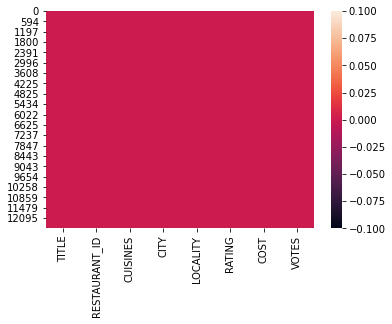

In [1149]:
sns.heatmap(df_train.isnull())

In [1150]:
# To check Correlation

In [1151]:
df_traincor=df_train.corr()
df_traincor

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
TITLE,1.000000,0.006901,0.244163,-0.008391,0.036253,-0.162414,-0.263957,-0.134211
RESTAURANT_ID,0.006901,1.000000,0.057990,0.010561,-0.010336,0.032728,0.040046,-0.002592
CUISINES,0.244163,0.057990,1.000000,0.028964,0.020146,-0.065326,-0.017516,-0.037786
CITY,-0.008391,0.010561,0.028964,1.000000,0.057687,0.063261,0.052132,0.049922
LOCALITY,0.036253,-0.010336,0.020146,0.057687,1.000000,-0.020959,-0.014766,-0.032611
RATING,-0.162414,0.032728,-0.065326,0.063261,-0.020959,1.000000,0.326747,0.347949
COST,-0.263957,0.040046,-0.017516,0.052132,-0.014766,0.326747,1.000000,0.245256
VOTES,-0.134211,-0.002592,-0.037786,0.049922,-0.032611,0.347949,0.245256,1.000000


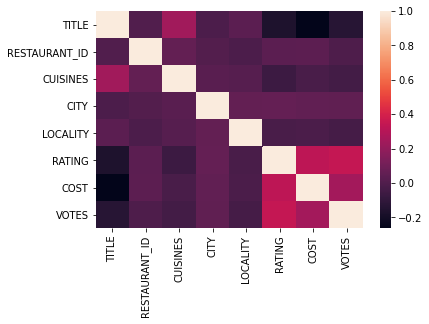

In [1152]:
sns.heatmap(df_traincor)

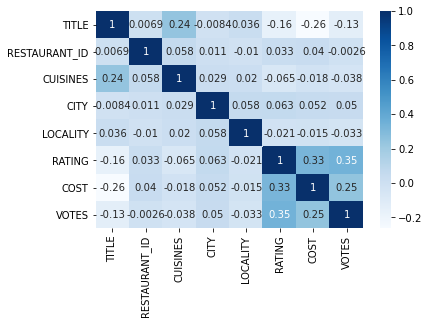

In [1153]:
plt.figure(figsize=(6,4))
sns.heatmap(df_traincor,cmap='Blues',annot=True)

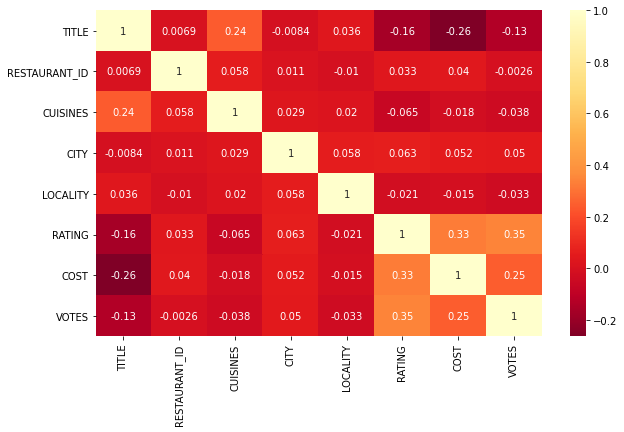

In [1154]:
plt.figure(figsize=(10,6))
sns.heatmap(df_traincor,cmap='YlOrRd_r',annot=True)

In [1155]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
0,31,9438,2627,320,285,3.6,1200,49.0
1,33,13198,289,67,1046,4.2,1500,30.0
2,31,10915,2976,67,1101,3.8,800,221.0
3,95,6346,4130,222,136,4.1,800,24.0
4,50,15387,1766,222,620,3.8,300,165.0
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,500,546.0
12686,33,9686,2143,222,133,4.3,1800,1214.0
12687,71,11133,2088,239,1342,4.0,1300,608.0
12688,31,6134,3506,67,631,3.5,400,32.0


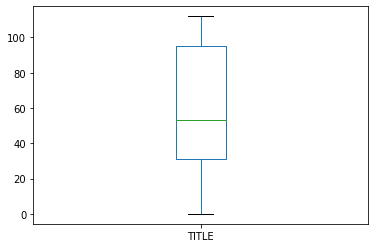

In [1156]:
#univariate analysis
df_train['TITLE'].plot.box()

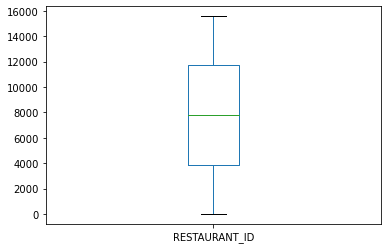

In [1157]:
df_train['RESTAURANT_ID'].plot.box()

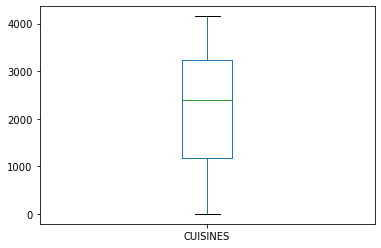

In [1158]:
df_train['CUISINES'].plot.box()

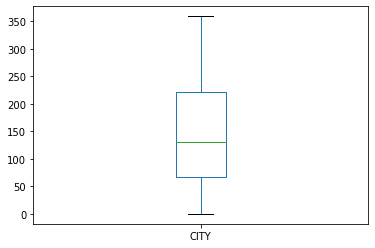

In [1163]:
df_train['CITY'].plot.box()

In [1164]:
collist=df_train.columns.values
ncol=12
nrows=10

In [1165]:
plt.subplot?

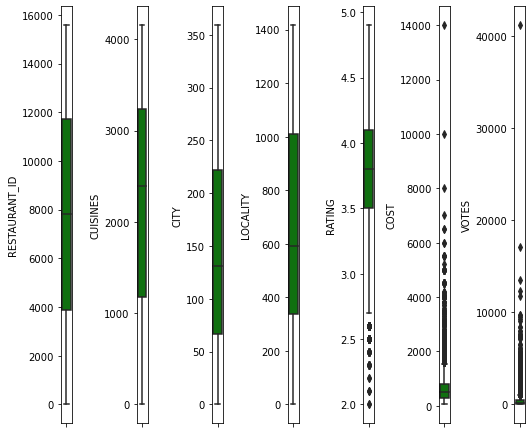

In [1166]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [1167]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
0,31,9438,2627,320,285,3.6,1200,49.0
1,33,13198,289,67,1046,4.2,1500,30.0
2,31,10915,2976,67,1101,3.8,800,221.0
3,95,6346,4130,222,136,4.1,800,24.0
4,50,15387,1766,222,620,3.8,300,165.0
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,500,546.0
12686,33,9686,2143,222,133,4.3,1800,1214.0
12687,71,11133,2088,239,1342,4.0,1300,608.0
12688,31,6134,3506,67,631,3.5,400,32.0


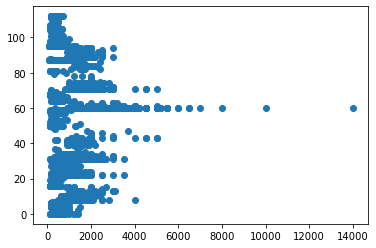

In [1168]:
#bivariate analysis
plt.scatter(df_train['COST'],df_train['TITLE'])

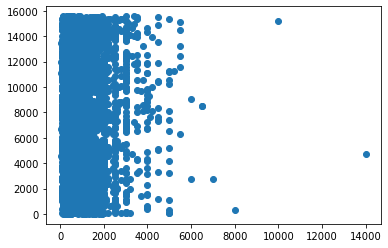

In [1169]:
plt.scatter(df_train['COST'],df_train['RESTAURANT_ID'])

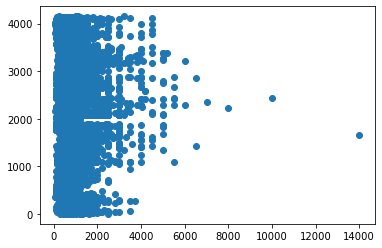

In [1170]:
plt.scatter(df_train['COST'],df_train['CUISINES'])

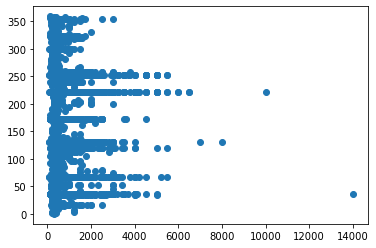

In [1173]:
plt.scatter(df_train['COST'],df_train['CITY'])

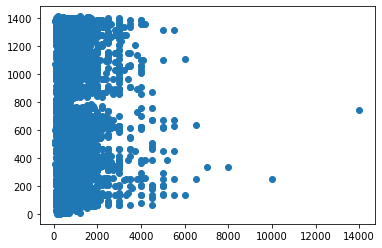

In [1174]:
plt.scatter(df_train['COST'],df_train['LOCALITY'])

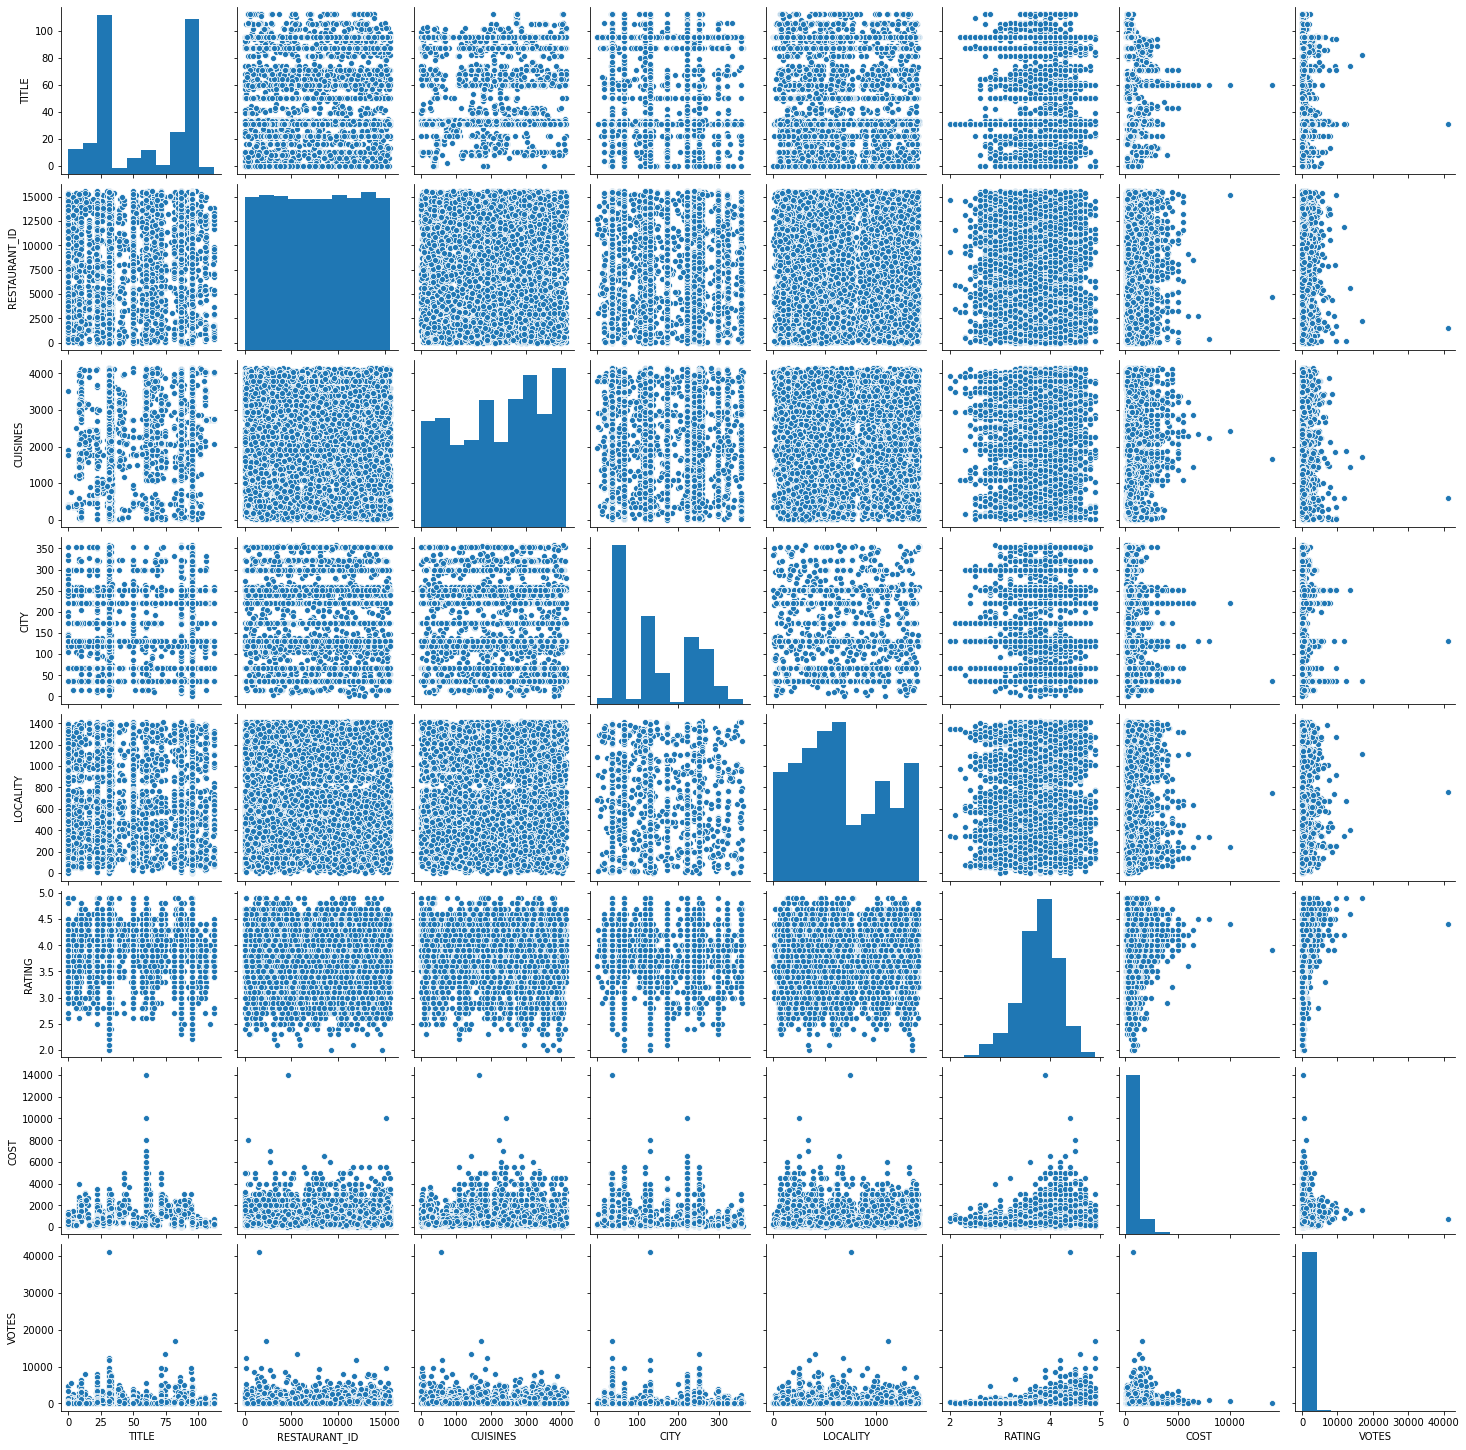

In [1175]:
sns.pairplot(df_train)

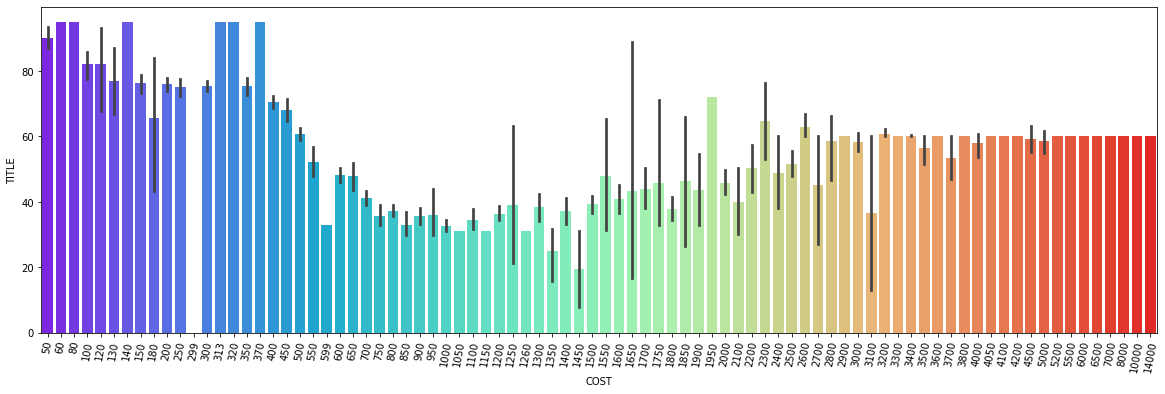

In [1176]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='TITLE', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

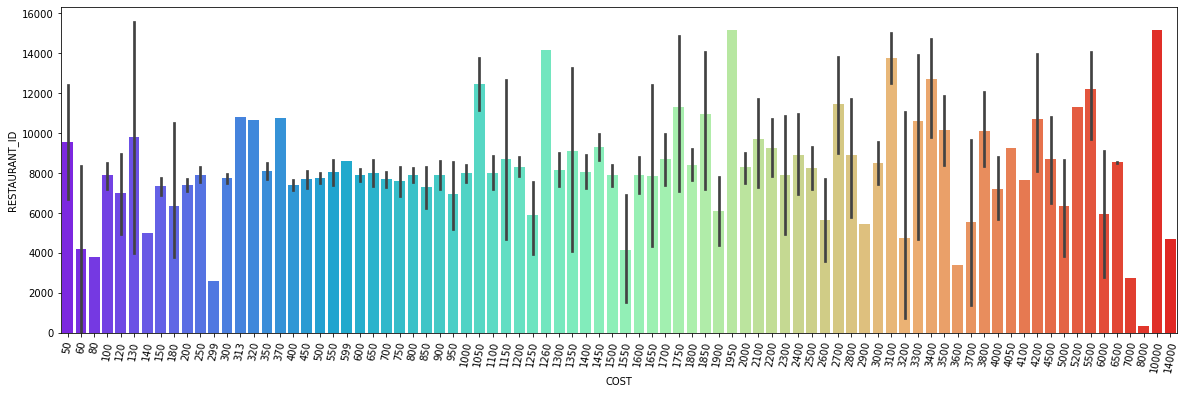

In [1177]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='RESTAURANT_ID', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

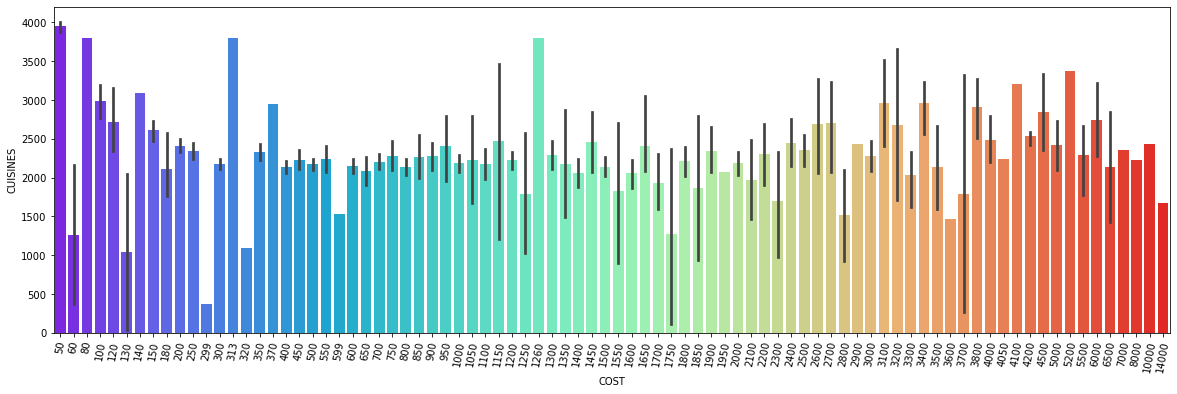

In [1178]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='CUISINES', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

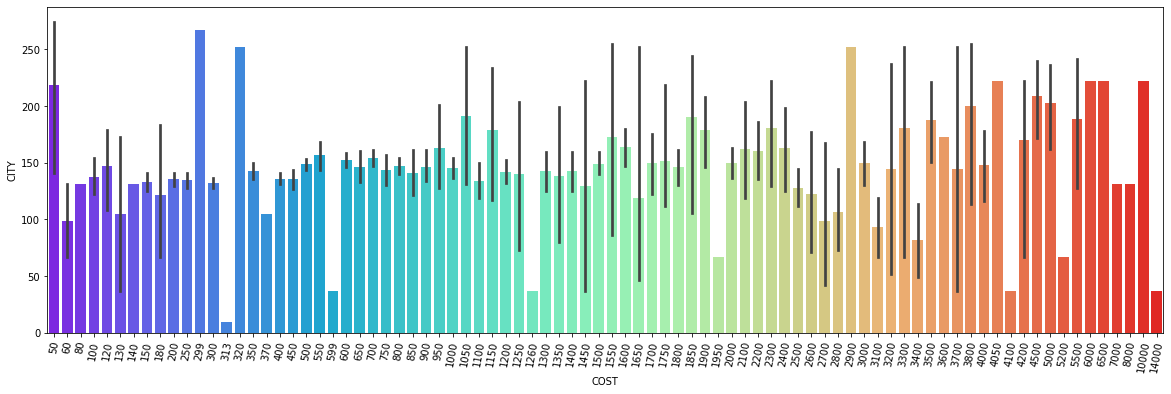

In [1180]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='CITY', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

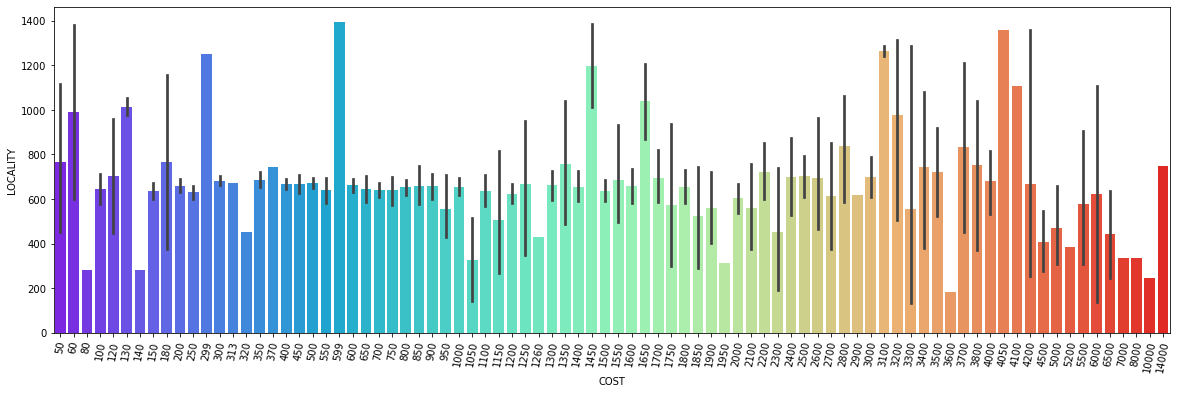

In [1181]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='LOCALITY', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

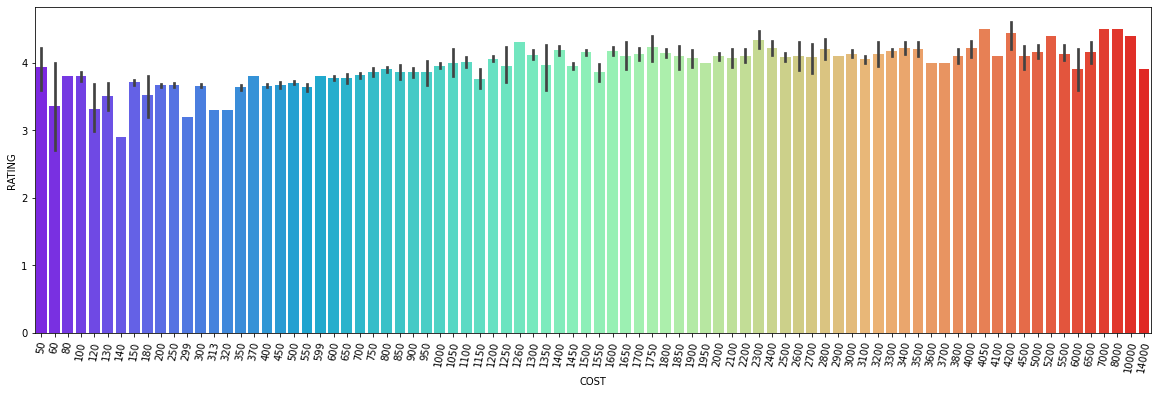

In [1182]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='RATING', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

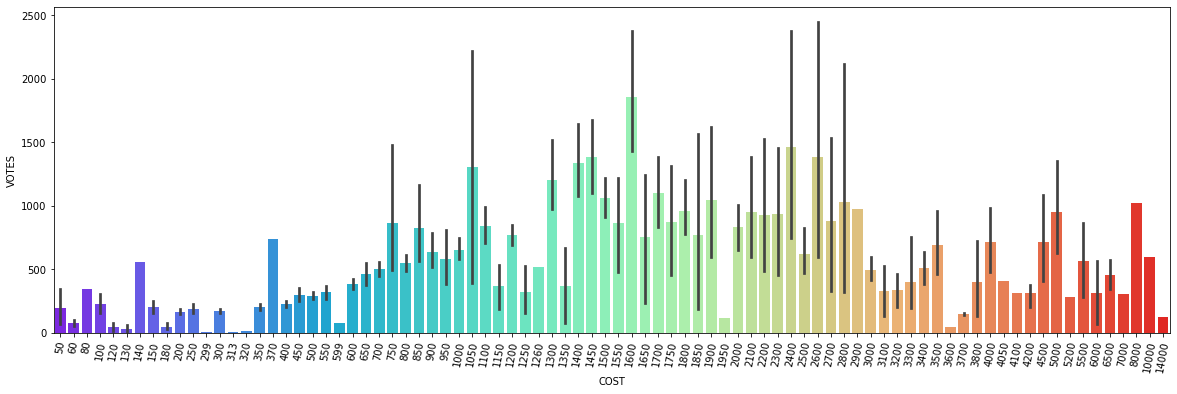

In [1183]:
plt.figure(figsize=(20,6))
sns.barplot(x='COST', y='VOTES', data=df_train,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

In [1184]:
# To check distribution of skewness

In [1185]:
df_train.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
CITY               int32
LOCALITY           int32
RATING           float64
COST               int64
VOTES            float64
dtype: object

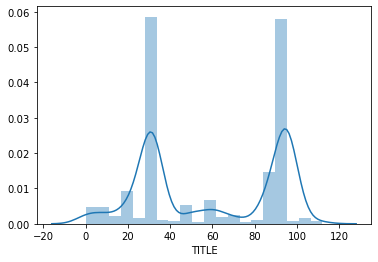

In [1186]:
sns.distplot(df_train['TITLE'])

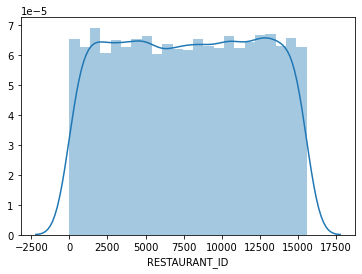

In [1187]:
sns.distplot(df_train['RESTAURANT_ID'])

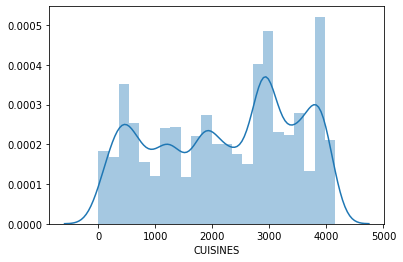

In [1188]:
sns.distplot(df_train['CUISINES'])

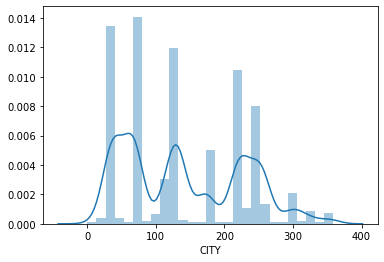

In [1189]:
sns.distplot(df_train['CITY'])

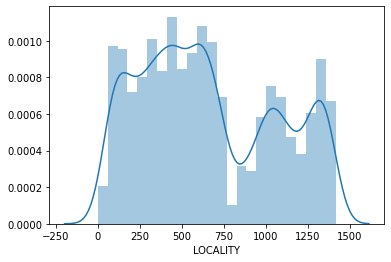

In [1190]:
sns.distplot(df_train['LOCALITY'])

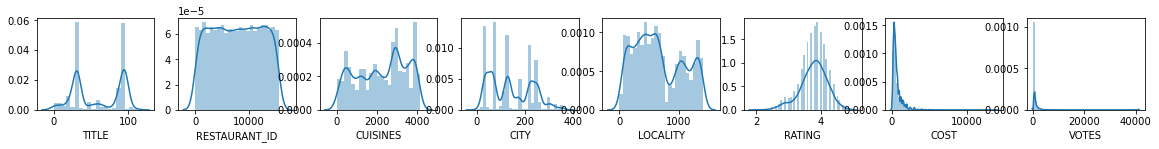

In [1191]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_train[collist[i]])

In [1192]:
# Removing Outliers

In [1193]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[0.85707518, 0.36552401, 0.32334035, ..., 0.43938568, 0.80258526,
        0.43511914],
       [0.7956203 , 1.19948331, 1.61205292, ..., 0.98217685, 1.26730995,
        0.45766608],
       [0.85707518, 0.69311919, 0.61224208, ..., 0.0344685 , 0.18295234,
        0.23100995],
       ...,
       [0.37202248, 0.74147109, 0.12284313, ..., 0.50832267, 0.95749349,
        0.22823572],
       [0.85707518, 0.36729554, 1.05097537, ..., 0.67631277, 0.43668058,
        0.45529272],
       [0.85707518, 0.30164342, 0.58740812, ..., 0.91323985, 0.12686412,
        0.31011673]])

In [1194]:
threshold=3
print(np.where(z>3))

(array([   81,   151,   176,   185,   196,   273,   283,   287,   315,
         322,   332,   354,   391,   398,   429,   460,   466,   518,
         552,   617,   673,   712,   729,   766,   778,   781,   797,
         834,   885,   886,   892,   922,   932,   949,  1037,  1038,
        1051,  1055,  1092,  1137,  1229,  1230,  1275,  1343,  1345,
        1348,  1349,  1391,  1406,  1454,  1475,  1490,  1511,  1534,
        1538,  1603,  1616,  1621,  1655,  1666,  1686,  1713,  1747,
        1761,  1762,  1802,  1891,  1911,  1918,  1928,  2001,  2015,
        2017,  2073,  2106,  2109,  2134,  2140,  2149,  2167,  2246,
        2273,  2312,  2375,  2381,  2391,  2449,  2455,  2460,  2502,
        2536,  2638,  2653,  2667,  2684,  2709,  2713,  2717,  2739,
        2762,  2767,  2770,  2782,  2886,  2910,  2919,  2924,  2993,
        3012,  3036,  3041,  3092,  3093,  3094,  3104,  3167,  3175,
        3176,  3189,  3205,  3207,  3211,  3230,  3253,  3261,  3277,
        3354,  3356

In [1195]:
#row and column

z[13][2]

0.3051287763384582

In [1196]:
z[15][5]

0.4393856780059369

In [1197]:
df_train1=df_train[(z<3).all(axis=1)]

In [1198]:
df_train1

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
0,31,9438,2627,320,285,3.6,1200,49.0
1,33,13198,289,67,1046,4.2,1500,30.0
2,31,10915,2976,67,1101,3.8,800,221.0
3,95,6346,4130,222,136,4.1,800,24.0
4,50,15387,1766,222,620,3.8,300,165.0
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,500,546.0
12686,33,9686,2143,222,133,4.3,1800,1214.0
12687,71,11133,2088,239,1342,4.0,1300,608.0
12688,31,6134,3506,67,631,3.5,400,32.0


In [1199]:
print("training data before removing outliers",df_train.shape)
print('\n')
print("training data after removing outliers",df_train1.shape)

training data before removing outliers (11486, 8)


training data after removing outliers (11027, 8)


In [1200]:
#459 rows are related as an outliers

In [1201]:
df_train1.dtypes

TITLE              int32
RESTAURANT_ID      int64
CUISINES           int32
CITY               int32
LOCALITY           int32
RATING           float64
COST               int64
VOTES            float64
dtype: object

In [1202]:
df_train1.skew()

TITLE           -0.037794
RESTAURANT_ID   -0.000083
CUISINES        -0.212525
CITY             0.369938
LOCALITY         0.325773
RATING          -0.402301
COST             1.764897
VOTES            2.518308
dtype: float64

In [1203]:
# Trating skewness via log method

for col in df_train1.columns:
    if df_train1[col].skew()>0.55:
        df_train1[col]=np.log1p(df_train1[col])

In [1204]:
df_train1.skew()

TITLE           -0.037794
RESTAURANT_ID   -0.000083
CUISINES        -0.212525
CITY             0.369938
LOCALITY         0.325773
RATING          -0.402301
COST             0.173301
VOTES           -0.106334
dtype: float64

In [1205]:
# Regressor Model Building

In [1206]:
df_train1

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
0,31,9438,2627,320,285,3.6,7.090910,3.912023
1,33,13198,289,67,1046,4.2,7.313887,3.433987
2,31,10915,2976,67,1101,3.8,6.685861,5.402677
3,95,6346,4130,222,136,4.1,6.685861,3.218876
4,50,15387,1766,222,620,3.8,5.707110,5.111988
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,6.216606,6.304449
12686,33,9686,2143,222,133,4.3,7.496097,7.102499
12687,71,11133,2088,239,1342,4.0,7.170888,6.411818
12688,31,6134,3506,67,631,3.5,5.993961,3.496508


In [1207]:
y=df_train1.iloc[:,7]
y

0        3.912023
1        3.433987
2        5.402677
3        3.218876
4        5.111988
           ...   
12685    6.304449
12686    7.102499
12687    6.411818
12688    3.496508
12689    6.519147
Name: VOTES, Length: 11027, dtype: float64

In [1208]:
x =df_train1.drop(columns=['COST'],axis=1)
x

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,31,9438,2627,320,285,3.6,3.912023
1,33,13198,289,67,1046,4.2,3.433987
2,31,10915,2976,67,1101,3.8,5.402677
3,95,6346,4130,222,136,4.1,3.218876
4,50,15387,1766,222,620,3.8,5.111988
...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,6.304449
12686,33,9686,2143,222,133,4.3,7.102499
12687,71,11133,2088,239,1342,4.0,6.411818
12688,31,6134,3506,67,631,3.5,3.496508


In [1209]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [1210]:
print(x_train.shape, '\t',x_test.shape)

(7718, 7) 	 (3309, 7)


In [1211]:
print(y_train.shape, '\t' ,y_test.shape)

(7718,) 	 (3309,)


In [1216]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1217]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 1.0
Error:
Mean absolute error: 8.20840323283604e-15
Mean squared error: 1.0390061295218821e-28
Root Mean Squared Error: 1.0193165011525528e-14
r2_score:  1.0
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 0.0002610479435081618
Mean squared error: 8.725362786687524e-07
Root Mean Squared Error: 0.0009340965039377636
r2_score:  0.9999995249675644
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.25732648275672043
Error:
Mean absolute error: 1.161341573361886
Mean squared error: 2.042937563167571
Root Mean Squared Error: 1.4293136685722876
r2_score:  -0.11223066617301747
*************************************************************************************************************


Score of SVR() is : 0.025506147060841422
Erro

In [1214]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [1. 1. 1. 1.]
Mean Score: 1.0
Standard deviation: 0.0
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [0.99999961 0.99999943 0.99999946 0.9999994 ]
Mean Score: 0.9999994750083125
Standard deviation: 8.231323885594066e-08
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-0.13629741 -0.11140703 -0.09834116 -0.13768536]
Mean Score: -0.12093274082120675
Standard deviation: 0.01671707180692275
*************************************************************************************************************


Score of SVR() is :
Score: [0.00982878 0.02679145 0.02687922 0.02878078]
Mean Score: 0.023070057303805652
Standard deviation: 0.007686062428856458
*********************************************************************************************

In [1218]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001, 'random_state': 42}

In [1221]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error :', mean_squared_error(y_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y_test,predrd))
print("\n")
print("r2_score:",r2_score(y_test,predrd))

Score: 0.9999999927277314


Mean absolute error: 9.517056852227704e-05
Mean squared error : 1.3470642221117731e-08
Root Mean Squared error: 1.3470642221117731e-08


r2_score: 0.9999999926662168


In [1222]:
# cross Validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.99999999 0.99999999 0.99999999 0.99999999]
Mean Score: 0.9999999936149017
Standard deviation: 2.2940074647363396e-10


In [1223]:
# Using Ensemble Technique to Boostup our score

In [1224]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error :', mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))

Score: 0.9999999528418045


Mean absolute error: 0.00023363246565908231
Mean squared error : 4.844645308520425e-07
Root Mean Squared Error: 0.0006960348632446815


r2_score: 0.9999997362443583


In [1225]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

Score: 0.7780841486294019


Mean absolute error: 0.5256055533545199
Mean squared error: 0.40980721639505463
Root Mean Squared Error: 0.6401618673390774


r2_score: 0.7768898269280123


In [1226]:
# Cross Validate AdaBoost Regressor

score=cross_val_score(adb,x,y,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [0.77625597 0.77446692 0.77448883 0.77993055]
Mean Score: 0.7762855676781761
Standard deviation: 0.002226122218814407


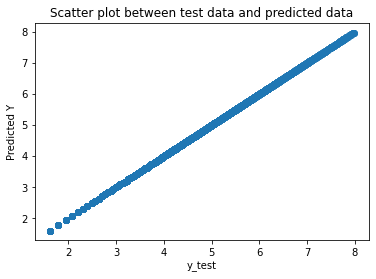

In [1227]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [1228]:
#Saving the RandomForestRegressor

In [1229]:
df_train=pd.DataFrame(predadb)
df_train.to_csv('rfr_predicton.csv')

In [1230]:
#Saving the RandomForestRegressor with Pickle 

In [1357]:
import pickle
filename = 'Restaurtant_food.pkl'
pickle.dump(rf,open(filename,'wb'))

# Test Data

In [1232]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [1234]:
df_test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [1237]:
df_test.shape

(4231, 8)

In [1238]:
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [1239]:
df_test.count()

TITLE            4231
RESTAURANT_ID    4231
CUISINES         4231
TIME             4231
CITY             4196
LOCALITY         4201
RATING           4229
VOTES            3829
dtype: int64

In [1240]:
df_test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [1241]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [1242]:
df_test.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4226,False,False,False,False,False,False,False,False
4227,False,False,False,False,False,False,False,False
4228,False,False,False,False,False,False,False,False
4229,False,False,False,False,False,False,False,True


In [1243]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [1244]:
df_test.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [1245]:
df_train.dtypes

0    float64
dtype: object

In [1246]:
df_test.drop(columns='TIME',inplace=True)

In [1247]:
cols_object_str=["CITY"]
for col in cols_object_str:
    df_test[col]=df_test[col].astype(str)
    
cols_object_str=["LOCALITY"]
for col in cols_object_str:
    df_test[col]=df_test[col].astype(str)  

In [1255]:
df_test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [1256]:
df_test['CITY'].unique

<bound method Series.unique of 0             Noida
1            Mumbai
2            Mumbai
3         Faridabad
4             Kochi
           ...     
4226      New Delhi
4227      Bangalore
4228      Faridabad
4229          Kochi
4230    Bandra West
Name: CITY, Length: 4231, dtype: object>

In [1257]:
df_test['LOCALITY'].unique

<bound method Series.unique of 0              Sector 18
1             Grant Road
2           Marine Lines
3                    NIT
4                 Kaloor
              ...       
4226        Punjabi Bagh
4227          HSR Layout
4228           Sector 86
4229               Kochi
4230    Perry Cross Road
Name: LOCALITY, Length: 4231, dtype: object>

In [1259]:
le=LabelEncoder()
df_test['TITLE']=le.fit_transform(df_test['TITLE'])
df_test['TITLE']

0       23
1       75
2       23
3       66
4       75
        ..
4226    23
4227    66
4228    75
4229    75
4230    75
Name: TITLE, Length: 4231, dtype: int64

In [1260]:
le=LabelEncoder()
df_test['CUISINES']=le.fit_transform(df_test['CUISINES'])
df_test['CUISINES']


0       1293
1       1632
2       1455
3        208
4       1637
        ... 
4226    1425
4227     267
4228     679
4229    1541
4230    1145
Name: CUISINES, Length: 4231, dtype: int64

In [1261]:
le=LabelEncoder()
df_test['CITY']=le.fit_transform(df_test['CITY'])
df_test['CITY']

0       110
1        96
2        96
3        41
4        78
       ... 
4226    108
4227      9
4228     41
4229     78
4230      8
Name: CITY, Length: 4231, dtype: int64

In [1262]:
le=LabelEncoder()
df_test['LOCALITY']=le.fit_transform(df_test['LOCALITY'])
df_test['LOCALITY']

0       662
1       221
2       411
3       456
4       300
       ... 
4226    597
4227    237
4228    696
4229    332
4230    580
Name: LOCALITY, Length: 4231, dtype: int32

In [1263]:
df_test = df_test.join(df_test['VOTES'].str.split(expand=True).add_prefix('VOTES'))

In [1265]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,VOTES0,VOTES1
0,23,4085,1293,110,662,4.3,564 votes,564,votes
1,75,12680,1632,96,221,4.2,61 votes,61,votes
2,23,1411,1455,96,411,3.8,350 votes,350,votes
3,66,204,208,41,456,3.8,1445 votes,1445,votes
4,75,13453,1637,78,300,3.6,23 votes,23,votes
...,...,...,...,...,...,...,...,...,...
4226,23,9057,1425,108,597,3.9,287 votes,287,votes
4227,66,1247,267,9,237,4.3,469 votes,469,votes
4228,75,8617,679,41,696,3.7,53 votes,53,votes
4229,75,6485,1541,78,332,-,NaN,NaN,NaN


In [1267]:
df_test.drop(df_test.columns[[6,8]],axis=1,inplace=True)

In [1269]:
df_test.rename(columns = {'VOTES0':'VOTES'}, inplace = True) 

In [1270]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,110,662,4.3,564
1,75,12680,1632,96,221,4.2,61
2,23,1411,1455,96,411,3.8,350
3,66,204,208,41,456,3.8,1445
4,75,13453,1637,78,300,3.6,23
...,...,...,...,...,...,...,...
4226,23,9057,1425,108,597,3.9,287
4227,66,1247,267,9,237,4.3,469
4228,75,8617,679,41,696,3.7,53
4229,75,6485,1541,78,332,-,NaN


In [1274]:
df_test.isnull().values.any()

True

In [1283]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
CITY               0
LOCALITY           0
RATING             2
VOTES            402
dtype: int64

In [1275]:
df_test.shape

(4231, 7)

In [1276]:
df_test.mean()

TITLE              45.781612
RESTAURANT_ID    7791.438431
CUISINES          928.372489
CITY               59.445285
LOCALITY          387.169936
dtype: float64

In [1284]:
df_test = df_test.dropna()

In [1286]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [1287]:
df_test.dtypes

TITLE             int64
RESTAURANT_ID     int64
CUISINES          int64
CITY              int64
LOCALITY          int32
RATING           object
VOTES            object
dtype: object

In [1288]:
cols_object_float=["RATING"]
for col in cols_object_float:
    df_test[col]=df_test[col].astype(float)
        
cols_object_float=["VOTES"]
for col in cols_object_float:
    df_test[col]=df_test[col].astype(float)  

In [1289]:
df_test.dtypes

TITLE              int64
RESTAURANT_ID      int64
CUISINES           int64
CITY               int64
LOCALITY           int32
RATING           float64
VOTES            float64
dtype: object

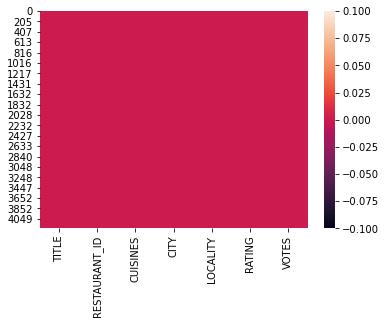

In [1292]:
sns.heatmap(df_test.isnull())

In [1293]:
# To check Correlation

In [1294]:
df_testcor=df_test.corr()
df_testcor

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
TITLE,1.000000,-0.008982,0.256011,-0.009264,0.045701,-0.138972,-0.136488
RESTAURANT_ID,-0.008982,1.000000,0.043966,-0.002802,-0.003310,0.020074,-0.002645
CUISINES,0.256011,0.043966,1.000000,0.012267,0.020871,-0.074308,-0.040477
CITY,-0.009264,-0.002802,0.012267,1.000000,0.047927,0.061567,0.037856
LOCALITY,0.045701,-0.003310,0.020871,0.047927,1.000000,-0.024383,-0.029314
RATING,-0.138972,0.020074,-0.074308,0.061567,-0.024383,1.000000,0.356364
VOTES,-0.136488,-0.002645,-0.040477,0.037856,-0.029314,0.356364,1.000000


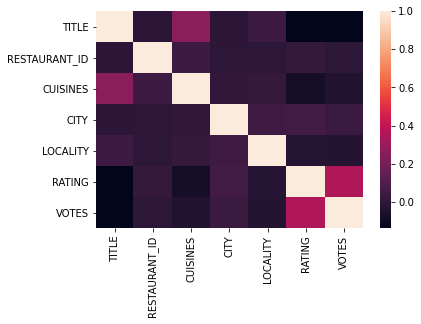

In [1295]:
sns.heatmap(df_testcor)

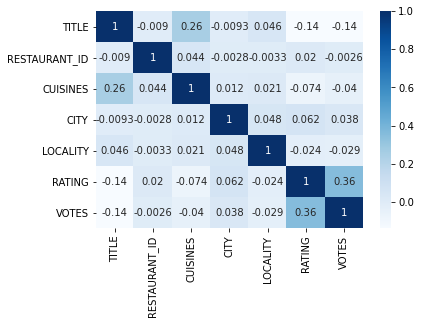

In [1296]:
plt.figure(figsize=(6,4))
sns.heatmap(df_testcor,cmap='Blues',annot=True)

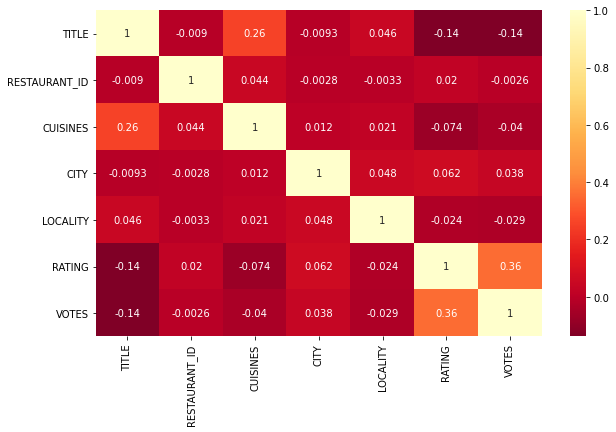

In [1297]:
plt.figure(figsize=(10,6))
sns.heatmap(df_testcor,cmap='YlOrRd_r',annot=True)

In [1298]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,110,662,4.3,564.0
1,75,12680,1632,96,221,4.2,61.0
2,23,1411,1455,96,411,3.8,350.0
3,66,204,208,41,456,3.8,1445.0
4,75,13453,1637,78,300,3.6,23.0
...,...,...,...,...,...,...,...
4225,75,1670,1425,96,221,4.0,197.0
4226,23,9057,1425,108,597,3.9,287.0
4227,66,1247,267,9,237,4.3,469.0
4228,75,8617,679,41,696,3.7,53.0


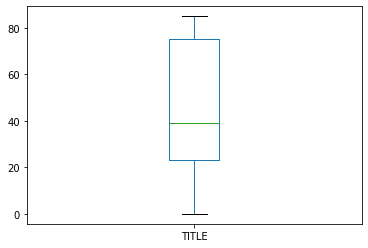

In [1299]:
#univariate analysis
df_test['TITLE'].plot.box()

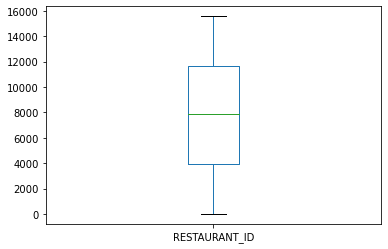

In [1301]:
df_test['RESTAURANT_ID'].plot.box()

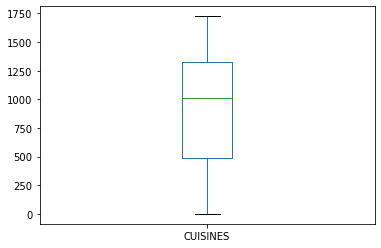

In [1302]:
df_test['CUISINES'].plot.box()

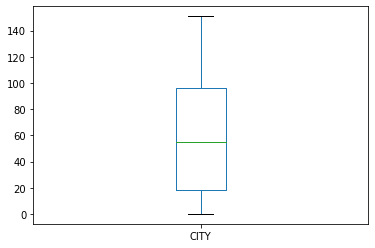

In [1303]:
df_test['CITY'].plot.box()

In [1306]:
collist=df_test.columns.values
ncol=12
nrows=10

In [1305]:
plt.subplot?

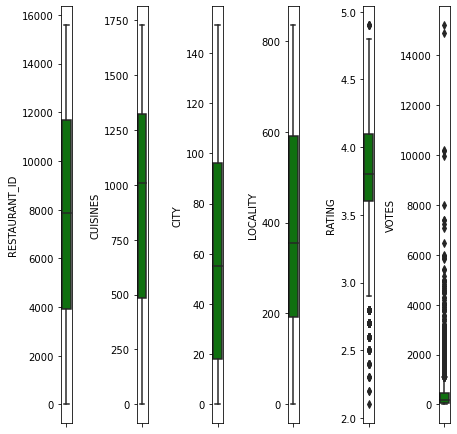

In [1307]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_test[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [1308]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,110,662,4.3,564.0
1,75,12680,1632,96,221,4.2,61.0
2,23,1411,1455,96,411,3.8,350.0
3,66,204,208,41,456,3.8,1445.0
4,75,13453,1637,78,300,3.6,23.0
...,...,...,...,...,...,...,...
4225,75,1670,1425,96,221,4.0,197.0
4226,23,9057,1425,108,597,3.9,287.0
4227,66,1247,267,9,237,4.3,469.0
4228,75,8617,679,41,696,3.7,53.0


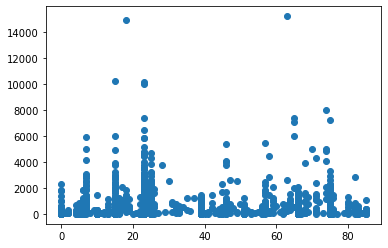

In [1311]:
#bivariate analysis
plt.scatter(df_test['TITLE'],df_test['VOTES'])

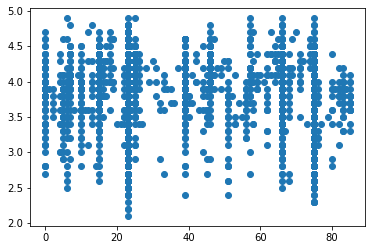

In [1312]:
plt.scatter(df_test['TITLE'],df_test['RATING'])

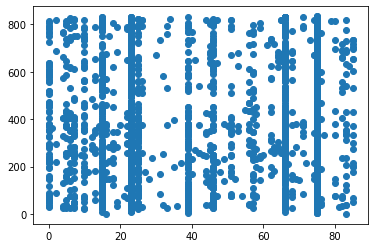

In [1313]:
plt.scatter(df_test['TITLE'],df_test['LOCALITY'])

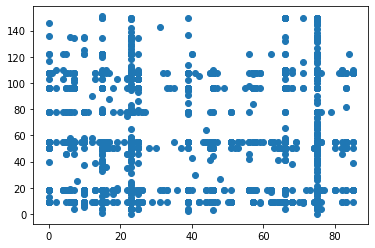

In [1315]:
plt.scatter(df_test['TITLE'],df_test['CITY'])

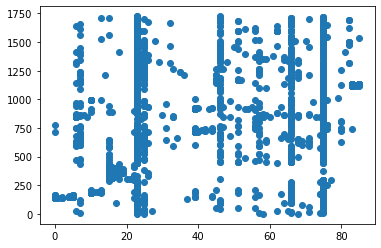

In [1317]:
plt.scatter(df_test['TITLE'],df_test['CUISINES'])

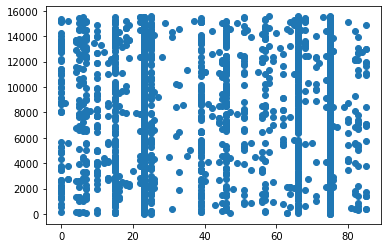

In [1318]:
plt.scatter(df_test['TITLE'],df_test['RESTAURANT_ID'])

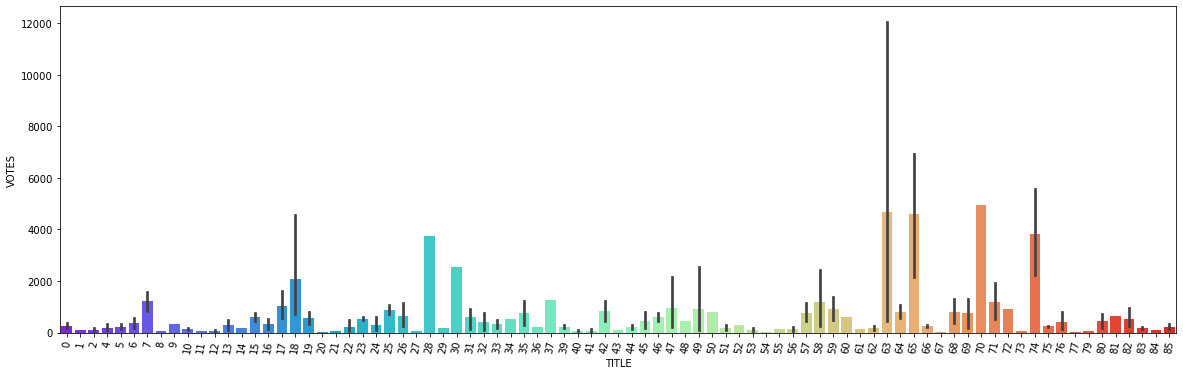

In [1320]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='VOTES', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

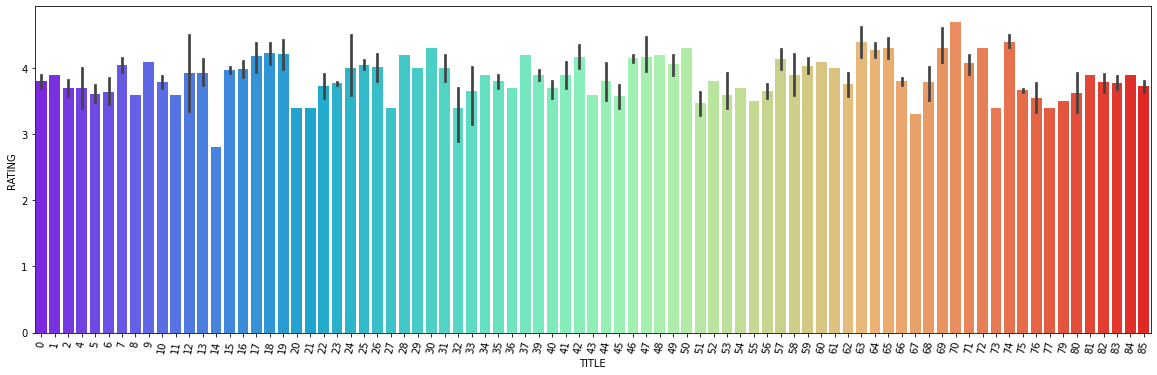

In [1321]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='RATING', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

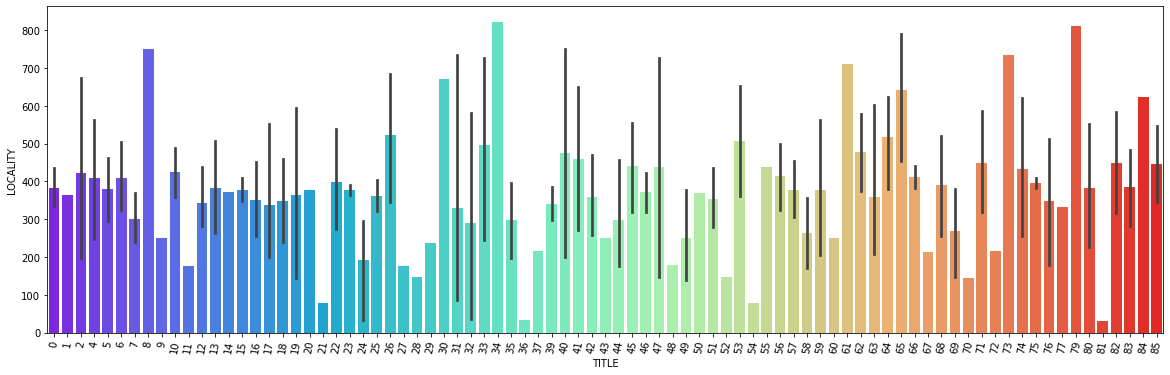

In [1322]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='LOCALITY', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

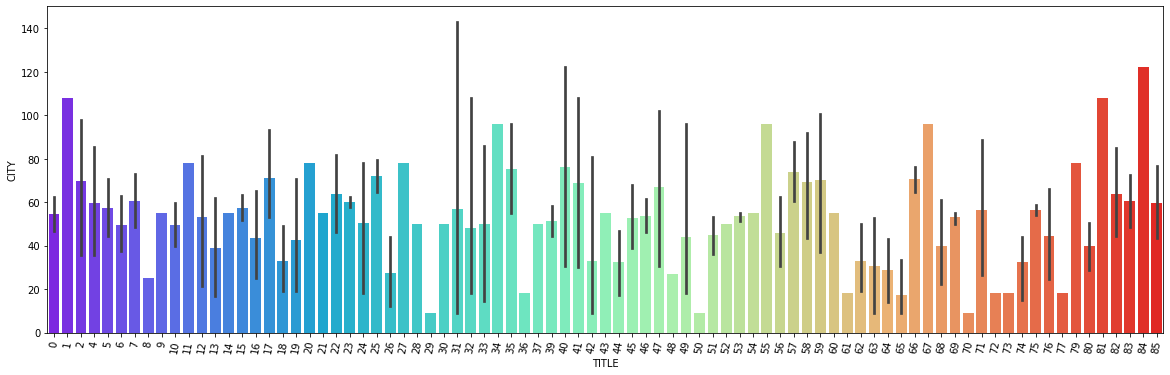

In [1323]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='CITY', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

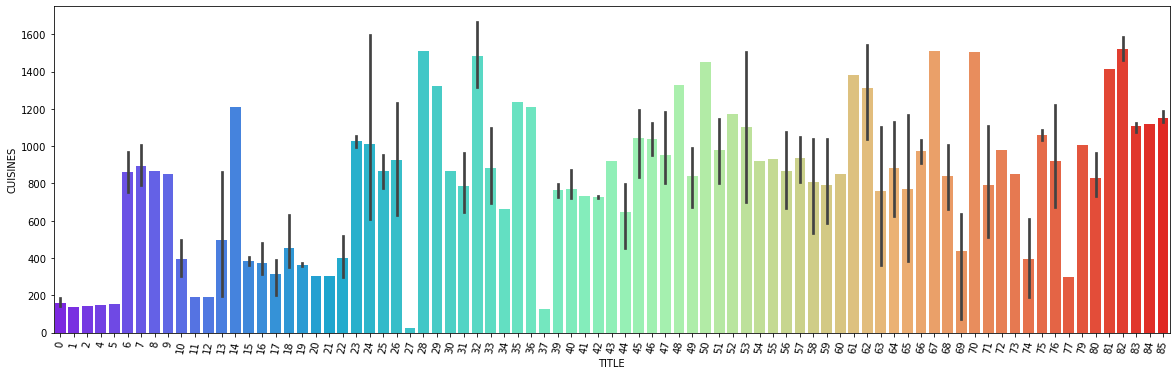

In [1324]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='CUISINES', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

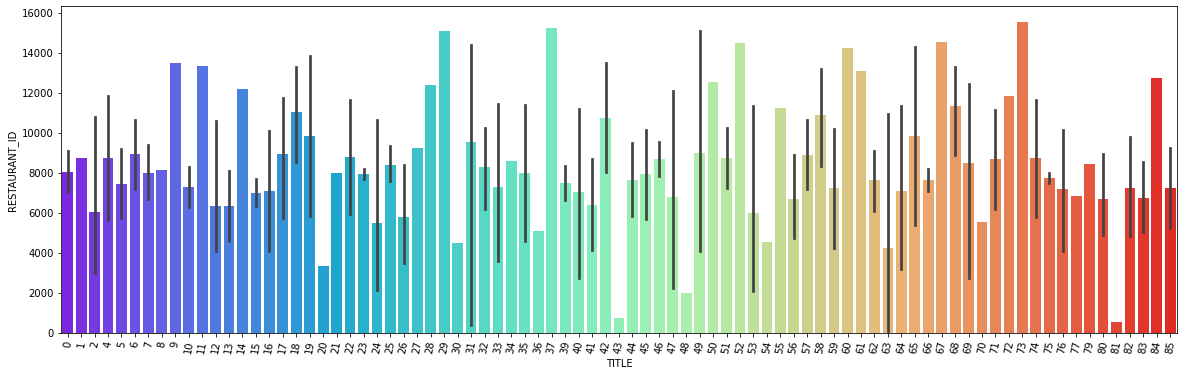

In [1325]:
plt.figure(figsize=(20,6))
sns.barplot(x='TITLE', y='RESTAURANT_ID', data=df_test,palette='rainbow')
plt.xticks(rotation=80)
plt.show()

In [1326]:
# To check distribution of skewness

In [1327]:
df_test.dtypes

TITLE              int64
RESTAURANT_ID      int64
CUISINES           int64
CITY               int64
LOCALITY           int32
RATING           float64
VOTES            float64
dtype: object

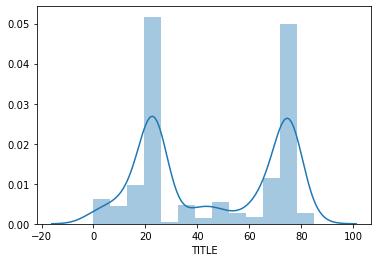

In [1328]:
sns.distplot(df_test['TITLE'])

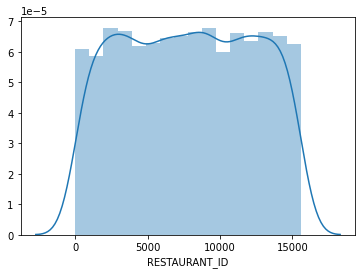

In [1330]:
sns.distplot(df_test['RESTAURANT_ID'])

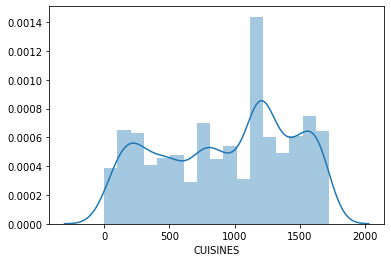

In [1331]:
sns.distplot(df_test['CUISINES'])

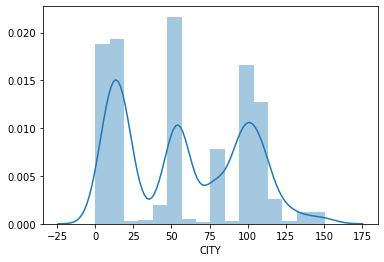

In [1332]:
sns.distplot(df_test['CITY'])

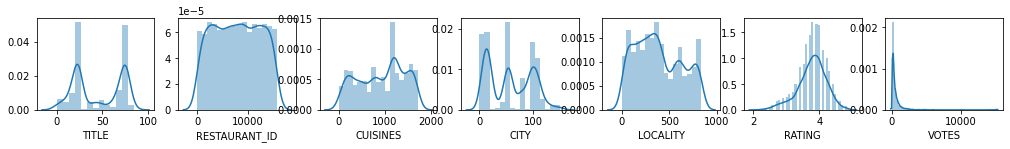

In [1335]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_test[collist[i]])

In [1337]:
# Removing Outliers

In [1338]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
z


array([[0.84793112, 0.83843892, 0.72501871, ..., 1.16177285, 1.19642004,
        0.16146143],
       [1.12992584, 1.0857374 , 1.40377829, ..., 0.6903792 , 0.96565778,
        0.44358015],
       [0.84793112, 1.43707156, 1.04938169, ..., 0.10760014, 0.04260875,
        0.09595189],
       ...,
       [0.78760444, 1.4737865 , 1.32928019, ..., 0.62318094, 1.19642004,
        0.04718916],
       [1.12992584, 0.17614713, 0.50435704, ..., 1.30456915, 0.1881535 ,
        0.45320308],
       [1.12992584, 1.21096125, 0.42868709, ..., 0.81738176, 0.1881535 ,
        0.44117442]])

In [1339]:
threshold=3
print(np.where(z>3))

(array([  26,   73,   76,   82,  255,  341,  429,  481,  642,  653,  680,
        684,  722,  790,  797,  839, 1000, 1019, 1036, 1043, 1168, 1174,
       1180, 1190, 1313, 1350, 1452, 1489, 1520, 1572, 1604, 1608, 1615,
       1683, 1727, 1801, 1821, 1888, 1930, 1997, 2081, 2101, 2128, 2130,
       2136, 2184, 2249, 2252, 2384, 2386, 2400, 2436, 2499, 2556, 2565,
       2572, 2624, 2650, 2669, 2716, 2738, 2821, 2894, 2958, 2991, 3106,
       3107, 3161, 3177, 3322, 3341, 3362, 3368, 3418, 3468, 3568, 3620,
       3678, 3725, 3730, 3757, 3769], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


In [1343]:
#row and column

z[13][2]

0.6108909925308468

In [1344]:
z[15][5]

0.73489552342819

In [1346]:
df_test1=df_test[(z<3).all(axis=1)]

In [1347]:
df_test1

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,110,662,4.3,564.0
1,75,12680,1632,96,221,4.2,61.0
2,23,1411,1455,96,411,3.8,350.0
3,66,204,208,41,456,3.8,1445.0
4,75,13453,1637,78,300,3.6,23.0
...,...,...,...,...,...,...,...
4225,75,1670,1425,96,221,4.0,197.0
4226,23,9057,1425,108,597,3.9,287.0
4227,66,1247,267,9,237,4.3,469.0
4228,75,8617,679,41,696,3.7,53.0


In [1348]:
print("training data before removing outliers",df_test.shape)
print('\n')
print("training data after removing outliers",df_test1.shape)

training data before removing outliers (3829, 7)


training data after removing outliers (3747, 7)


In [1349]:
#82 rows are related as an outliers

In [1350]:
df_test1.dtypes

TITLE              int64
RESTAURANT_ID      int64
CUISINES           int64
CITY               int64
LOCALITY           int32
RATING           float64
VOTES            float64
dtype: object

In [1351]:
df_test1.skew()

TITLE            0.002336
RESTAURANT_ID   -0.008550
CUISINES        -0.213710
CITY             0.198538
LOCALITY         0.292416
RATING          -0.505989
VOTES            2.483735
dtype: float64

In [1352]:
# Trating skewness via log method

In [1354]:
for col in df_test1.columns:
    if df_test1[col].skew()>0.55:
        df_test1[col]=np.log1p(df_test1[col])

In [1355]:
df_test1.skew()

TITLE            0.002336
RESTAURANT_ID   -0.008550
CUISINES        -0.213710
CITY             0.198538
LOCALITY         0.292416
RATING          -0.505989
VOTES           -0.201580
dtype: float64

In [1358]:
# Loading the model

fitted_model = pickle.load(open("Restaurtant_food.pkl","rb"))

In [1359]:
fitted_model

RandomForestRegressor(n_estimators=20, random_state=59)

In [1360]:
# Prediction over test data

predictions=fitted_model.predict(df_test1)

In [1361]:
predictions

array([6.3369129 , 4.12713439, 5.86135521, ..., 6.15273247, 3.98898405,
       4.15888308])

In [1362]:
test_df=pd.DataFrame(predrf)
test_df.to_csv('rfres_predictons.csv')

In [1364]:
df_train1

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,COST,VOTES
0,31,9438,2627,320,285,3.6,7.090910,3.912023
1,33,13198,289,67,1046,4.2,7.313887,3.433987
2,31,10915,2976,67,1101,3.8,6.685861,5.402677
3,95,6346,4130,222,136,4.1,6.685861,3.218876
4,50,15387,1766,222,620,3.8,5.707110,5.111988
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,131,342,3.8,6.216606,6.304449
12686,33,9686,2143,222,133,4.3,7.496097,7.102499
12687,71,11133,2088,239,1342,4.0,7.170888,6.411818
12688,31,6134,3506,67,631,3.5,5.993961,3.496508


In [1363]:
df_test1

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,110,662,4.3,6.336826
1,75,12680,1632,96,221,4.2,4.127134
2,23,1411,1455,96,411,3.8,5.860786
3,66,204,208,41,456,3.8,7.276556
4,75,13453,1637,78,300,3.6,3.178054
...,...,...,...,...,...,...,...
4225,75,1670,1425,96,221,4.0,5.288267
4226,23,9057,1425,108,597,3.9,5.662960
4227,66,1247,267,9,237,4.3,6.152733
4228,75,8617,679,41,696,3.7,3.988984
